<a href="https://colab.research.google.com/github/sa3dben/zero_modes/blob/main/K_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.special import gamma as gamma
from scipy.special import hyp2f1 as hyp2f1
from scipy.integrate import quad
from math import pi
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt


# Family 3 of zero modes
Now we will use the following family (correct the '-' in the article)
$$\phi = \alpha\ln(1 + r^\beta)$$

$$\Delta(a \,ln(1 + r^b)) = \frac{(a b^2 r^{ b-2})}{(1 + r^b)^2} $$

Which gives the fields
\begin{align*}
\psi = \begin{pmatrix}
        0 \\ \frac{1}{\left(1 + |\mathbf{x}|^\beta\right)^\alpha}
    \end{pmatrix}  && B = \frac{\alpha\beta^2 r^{\beta - 2}}{(1 + r^\beta)^2}\end{align*}

Let us find the maximum of the follwing funtion on $\alpha$ and $\beta$
$$K_3(\alpha, \beta) = \frac{\int_{\mathbb{R}^2}\frac{|\psi|^2}{|\mathbf{x}|}d\mathbf{x}}{\int_{\mathbb{R}^2}|B|^{3/2}d\mathbf{x} \, \int_{\mathbb{R}^2} |\psi|^2\mathrm{d}\mathbf{x} } =\frac{\int_0^\infty \frac{1}{(1 + r^\beta)^{2\alpha}}\mathrm{d}r}
{2\pi\alpha^{3/2}\beta^{3}\int_0^\infty \frac{r}{(1 + r^\beta)^{2\alpha}\mathrm{d}r}\int_0^\infty \frac{r^{\frac{3}{2}\beta - 2}}{(1 + r^\beta)^3}\mathrm{d}r}
$$
$$
=  \frac{\int_0^\infty f(r, \beta ,\alpha) \mathrm{d}r}
{2\pi\alpha^{3/2}\beta^{3}\int_0^\infty  g(r, \beta, \alpha)\mathrm{d}r \int_0^\infty h(r, \beta,\alpha)\mathrm{d}r}  $$

Under the condition for the integrals to converge $\alpha\beta > 1$

https://www.wolframalpha.com/input?i=int+1%2F%281+%2B+r%5Eb%29%5E%282a%29++wrt+r
$$\int \frac1{(1 + r^b)^{2 a}} dr = r F_1(2 a, 1/b, 1 + 1/b, -r^b) $$
$F_1$ is the https://reference.wolfram.com/language/ref/Hypergeometric2F1.html , https://en.wikipedia.org/wiki/Hypergeometric_function


https://www.wolframalpha.com/input?i=int+r%2F%281+%2B+r%5Eb%29%5E%282a%29++wrt+r
$$\int \frac{r}{(1 + r^b)^{2 a}} dr = \frac12 r^2 \, F_1(2 a, 2/b, (b + 2)/b, -r^b) $$

https://www.wolframalpha.com/input?i=int+r%5E%283%2F2b-2%29%2F%281+%2B+r%5Eb%29%5E3++wrt+r
$$ \int \frac{r^{(3/2 \, b - 2) }}{(1 + r^b)^3} dr = \frac{2 r^{3/2\, b - 1}}{3 b - 2}  F_1(3, 3/2 - 1/b, 5/2 - 1/b, -r^b)) $$


$$K_3(a,b) = \frac{ [r F_1(2 a, 1/b, 1 + 1/b, -r^b)]_0^{\infty} }
{  \frac{2\pi a^{3/2} b^{3}}{3 b - 2}  [r^2 \, F_1(2 a, 2/b, (b + 2)/b, -r^b)]_0^\infty \,  [r^{3/2\, b - 1} F_1(3, 3/2 - 1/b, 5/2 - 1/b, -r^b))]_0^\infty }  $$


In [ ]:
#test a=1; b=2
a=1
b=2
r0 =0.0000001
ri=10000
print(r0*hyp2f1(2*a,1/b,1+1/b, - r0**b))
print(ri*hyp2f1(2*a,1/b,1+1/b, - ri**b))
print(r0**2*hyp2f1(2*a,2/b,1+2/b, - r0**b))
print(ri**2*hyp2f1(2*a,2/b,1+2/b, - ri**b))
print(r0**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - r0**b))
print(ri**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - ri**b))
K312 = ri*hyp2f1(2*a,1/b,1+1/b, - ri**b) / ( ri**2*hyp2f1(2*a,2/b,1+2/b, - ri**b) * ri**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - ri**b) )
print( (3*b -2)*K312/ (2*pi*a**(3/2) * b**3)) #ok = 0.125
# ok

9.999999999999933e-08
0.7853981633971148
9.999999999999899e-15
0.9999999900000001
9.99999999999985e-15
0.49999999999999994
0.12500000124994695


In [ ]:
# check at r -> 0 all terms tend to 0 (for all a and b)
r0 = 0.0001
na, nb = (50, 50)
x = np.linspace(0.05, 10, na) # a>0.5 ?
y = np.linspace(0.05, 5, nb)
xa, xb = np.meshgrid(x, y)

eps = 0
for i in range(na):
    for j in range(nb):
        a= x[i]
        b= y[j]
        if a*b>1.01:
          eps = max(eps,abs(r0*hyp2f1(2*a,1/b,1+1/b, - r0**b)))
print(eps)

eps = 0
for i in range(na):
    for j in range(nb):
        a= x[i]
        b= y[j]
        if a*b>1.01:
          eps = max(eps,abs(r0**2*hyp2f1(2*a,2/b,1+2/b, - r0**b)))
print(eps)

eps = 0
for i in range(na):
    for j in range(nb):
        a= x[i]
        b= y[j]
        if a*b>1.01:
          eps = max(eps,abs(r0**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - r0**b)))
print(eps)


0.0001000000000000014
1.0000000000000113e-08
378.7002700121153


Hence the formula of K3(a,b) is the ratio of the $r \rightarrow +\infty$ limits, exepct for the third integral


$$K_3(a,b) = \frac{  \lim_{r\rightarrow +\infty}  r F_1(2 a, 1/b, 1 + 1/b, -r^b) }
{\frac{2\pi a^{3/2} b^{3}}{3 b - 2}  \, \lim_{r\rightarrow +\infty} (r^2 \, F_1(2 a, 2/b, (b + 2)/b, -r^b)) \,  [ r^{3/2\, b - 1} F_1(3, 3/2 - 1/b, 5/2 - 1/b, -r^b))]_0^\infty }  $$


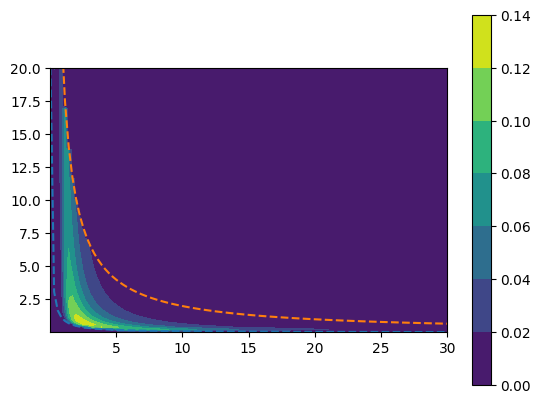

max(K3) =  0.12851112471756962
(4, 9)
449 2.5229357798165135 0.7821100917431193 1.9732135342142916
449 2.5229357798165135 0.7821100917431193 1.9732135342142916


In [ ]:
# check at r -> 0 all terms tend to 0 (for all a and b)
ri = 1000000
r0 = 0.0000001
na, nb = (110, 110)
x = np.linspace(0.05, 30, na)
y = np.linspace(0.05, 20, nb)
xa, xb = np.meshgrid(x, y)
k3 = 0.0*xa
K3 = 0.0*xa

lim_axb =20
for i in range(na):
    for j in range(nb):
        a= x[i]
        b= y[j]
        if (a*b>1.01) & (a*b<lim_axb):
          k3 = ri*hyp2f1(2*a,1/b,1+1/b, - ri**b) / ( ri**2*hyp2f1(2*a,2/b,1+2/b, - ri**b) * (ri**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - ri**b) - r0**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - r0**b) ) )
          K3[i,j] =(3*b -2)*k3/ (2*pi*a**(3/2) * b**3)


HH = plt.contourf(xa, xb, K3)
plt.axis('scaled')
plt.colorbar()
plt.plot(x,1/x, '--')
plt.plot(x,lim_axb/x, '--')
plt.show()

print('max(K3) = ', np.amax(K3))
indices = np.argmax(K3)
ind=np.unravel_index(indices,K3.shape)
print(ind)
print(indices, xa[ind], xb[ind], xa[ind] * xb[ind])
print(indices, xa[(indices//nb), indices%nb], xb[(indices//nb), indices%nb], xa[(indices//nb), indices%nb] * xb[(indices//nb), indices%nb])



max(K3) =  0.12837535666812241

index = 309

a = 2.7727272727272725 b = 0.6545454545454545

a.b=1.814876033057851


max(K3) =  0.12852079255078572
669 1.6972477064220184 1.1481651376146789 1.948720646410235


In [ ]:
#%pip install sympy
import  sympy as sp

In [ ]:
a, b, r = sp.symbols('a b r', real=True, positive=True)
F = sp.Function('F', real=True)



In [ ]:
F(x)

F([0.05, 0.324770642201835, 0.59954128440367, 0.874311926605505, 1.14908256880734, 1.42385321100917, 1.69862385321101, 1.97339449541284, 2.24816513761468, 2.52293577981651, 2.79770642201835, 3.07247706422018, 3.34724770642202, 3.62201834862385, 3.89678899082569, 4.17155963302752, 4.44633027522936, 4.72110091743119, 4.99587155963303, 5.27064220183486, 5.5454128440367, 5.82018348623853, 6.09495412844037, 6.3697247706422, 6.64449541284404, 6.91926605504587, 7.19403669724771, 7.46880733944954, 7.74357798165138, 8.01834862385321, 8.29311926605505, 8.56788990825688, 8.84266055045872, 9.11743119266055, 9.39220183486239, 9.66697247706422, 9.94174311926606, 10.2165137614679, 10.4912844036697, 10.7660550458716, 11.0408256880734, 11.3155963302752, 11.5903669724771, 11.8651376146789, 12.1399082568807, 12.4146788990826, 12.6894495412844, 12.9642201834862, 13.2389908256881, 13.5137614678899, 13.7885321100917, 14.0633027522936, 14.3380733944954, 14.6128440366972, 14.8876146788991, 15.1623853211009, 1

In [ ]:
F = sp.integrate(1 / (1 + r**b)**(2*a), r)
F

r*gamma(1/b)*hyper((2*a, 1/b), (1 + 1/b,), r**b*exp_polar(I*pi))/(b*gamma(1 + 1/b))

In [ ]:
F.subs(r,np.inf)

oo*hyper((2*a, 1/b), (1 + 1/b,), -oo)

## Analytic expression
We could express the following integral using the simple expression containing the Euler beta function

$$\int_0^\infty \frac{x^a}{(1 + x^b)^c} = \frac{1}{b}B\left(\frac{a + 1}{b}, c - \frac{a + 1 }{b}\right)$$

### proof
we have $$\int_0^\infty \frac{r^{2\alpha}}{(1 + r^2)^\beta} \mathrm{d}r =  
\frac{1}{2} \frac{\Gamma(\alpha + 1/2)\Gamma(\beta - \alpha - 1/2)}{\Gamma(\beta)}$$

By the substituition
$$r = x ^ {b/2}$$
and putting $ c = \beta$ and $\alpha = \frac{a + 1}{c} - \frac{1}{2}$ we obtain the desired result

 # analytical exression

 analytically we could express

$$K(\alpha, \beta) = \frac{B(1/\beta, 2\alpha - 1/\beta)}{2\pi \alpha^{3/2} \beta^2B(2/\beta, 2\alpha - 2/\beta)B(3/2 - 1/\beta, 3/2 + 1/\beta)}$$

Using
$B(z_1,z_2)=\frac{\Gamma(z_1)\,\Gamma(z_2)}{\Gamma(z_1+z_2)}$, we get :
$$K(\alpha, \beta) = \frac{ \frac{\Gamma(1/\beta)\,\Gamma(2\alpha - 1/\beta)}{\Gamma(2\alpha)} } {2\pi \alpha^{3/2} \beta^2 \frac{\Gamma(2/\beta)\,\Gamma(2\alpha - 2/\beta)}{\Gamma(2\alpha)} \frac{\Gamma(3/2 - 1/\beta)\,\Gamma(3/2 + 1/\beta)}{\Gamma(3)} } $$
$$
=\frac{ \Gamma(1/\beta)\,\Gamma(2\alpha - 1/\beta) } {2\pi \alpha^{3/2} \beta^2 \Gamma(2/\beta)\,\Gamma(2\alpha - 2/\beta) \frac{\Gamma(3/2 - 1/\beta)\,\Gamma(3/2 + 1/\beta)}{2} }
$$
$$
=\frac{ \Gamma(1/\beta)\,\Gamma(2\alpha - 1/\beta) } {\pi \alpha^{3/2} \beta^2 \Gamma(2/\beta)\,\Gamma(2\alpha - 2/\beta) \Gamma(3/2 - 1/\beta)\,\Gamma(3/2 + 1/\beta) }
$$

A simplifier pour enlever $(\infty/\infty)$ avec $\Gamma(x + 1) = x\Gamma(x) $ et $ \Gamma(x) \Gamma(x +1/2)=
2 \sqrt{\pi} / 4^x \Gamma(2x) ....$
https://agreg-maths.fr/uploads/versions/1457/fonction_gamma.pdf


$$
K(\alpha, \beta)=\frac{ 2  \Gamma(1/2 + 1/\beta) \Gamma(2\alpha - 1/\beta) } { 4^{1/\beta} \sqrt{\pi} \alpha^{3/2} \beta^2 \,\Gamma(2\alpha - 2/\beta) \Gamma(3/2 - 1/\beta)\,\Gamma(3/2 + 1/\beta) } = \frac{ 2   \Gamma(2\alpha - 1/\beta) } { 4^{1/\beta} \sqrt{\pi} \alpha^{3/2} \beta^2 (1/2 + 1/\beta) \,\Gamma(2\alpha - 2/\beta) \Gamma(3/2 - 1/\beta)\,\Gamma(1/2 + 1/\beta) }
$$

(diverge pour $\beta = \frac1{2\alpha}$ ) !

In [ ]:
from scipy.special import beta as beta
F = lambda b, a: beta(1 / b, 2*a - 1/b) / (2*pi*a**1.5*b**2)/beta(2/b, 2*a - 2/b) / beta(1.5 - 1/b, 1.5 + 1/b)
F_simp = lambda b, a: gamma(1 / b)*gamma(2*a - 1/b) / (pi*a**1.5*b**2)/gamma(2 / b)/gamma(2*a - 2/b)/gamma(3/2 - 1/b)/gamma(3/2 + 1/b)
F_simp2 = lambda b, a: 2*gamma(1/2 + 1/b)*gamma(2*a - 1/b) / (4**(1/b)*np.sqrt(pi)*a**1.5*b**2)/gamma(2*a - 2/b)/gamma(3/2 - 1/b)/gamma(3/2 + 1/b)
F_simp3 = lambda b, a: 2*gamma(2*a - 1/b) /(1/2 + 1/b)/ (4**(1/b)*np.sqrt(pi)*a**1.5*b**2)/gamma(2*a - 2/b)/gamma(3/2 - 1/b)/gamma(1/2 + 1/b)
#check for particular values
a = 1
b = 2
k3 = ri*hyp2f1(2*a,1/b,1+1/b, - ri**b) / ( ri**2*hyp2f1(2*a,2/b,1+2/b, - ri**b) * (ri**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - ri**b) - r0**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - r0**b) ) )
k = (3*b -2)*k3/ (2*pi*a**(3/2) * b**3)
print(F(b,a))
print(F_simp(b,a))
print(F_simp2(b,a))
print(F_simp3(b,a))
print(k)

a = 1.01
b = 1
print('-----')
print(F(b,a))
print(F_simp(b,a))
print(F_simp2(b,a))
print(F_simp3(b,a))
k3 = ri*hyp2f1(2*a,1/b,1+1/b, - ri**b) / ( ri**2*hyp2f1(2*a,2/b,1+2/b, - ri**b) * (ri**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - ri**b) - r0**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - r0**b) ) )
k = (3*b -2)*k3/ (2*pi*a**(3/2) * b**3)
print(k) # this method is worst when a.b approches 1

a = 2.01
b = 1
print('-----')
print(F(b,a))
print(F_simp(b,a))
print(F_simp2(b,a))
print(F_simp3(b,a))# this method is worst when a.b approches 2...
k3 = ri*hyp2f1(2*a,1/b,1+1/b, - ri**b) / ( ri**2*hyp2f1(2*a,2/b,1+2/b, - ri**b) * (ri**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - ri**b) - r0**(1.5*b-1)*hyp2f1(3,3/2 -1/b,5/2-1/b, - r0**b) ) )
k = (3*b -2)*k3/ (2*pi*a**(3/2) * b**3)
print(k) # this method is worst when a.b approches 1

0.12499999999999999
0.12499999999999999
0.125
0.125
0.1250000000001275
-----
0.0026618705182896944
0.002661870518289695
0.00209062821626654
0.0023590213253772163
0.011771437057833964
-----
0.09576267622220119
0.09576267622220118
0.0752118300269413
0.0848674621215293
0.09581411353826752


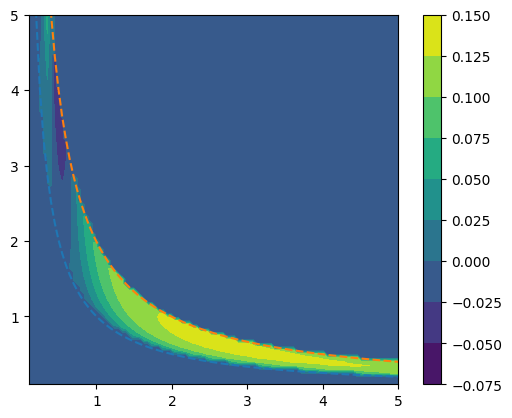

max(k3) =  0.13083905886227878
(10, 54)
1054 a = 2.7727272727272734 b= 0.594949494949495 a.b=  1.649632690541782


In [ ]:
na, nb = (100, 100)
x = np.linspace(0.1, 5, na)
y = np.linspace(0.1, 5, nb)
xa, xb = np.meshgrid(x, y)
k3 = 0.0*xa # intialize with zeros and with the right shape

lim_axb =1.99
for i in range(na):
    for j in range(nb):
        a= x[i]
        b= y[j]
        if (a*b>1.1) & (a*b<lim_axb):
          k3[i,j] = F_simp3(b,a)


HH = plt.contourf(xa, xb, k3)
plt.axis('scaled')
plt.colorbar()
plt.plot(x,1/x, '--')
plt.plot(x,lim_axb/x, '--')
plt.show()

print('max(k3) = ', np.amax(k3))
indices = np.argmax(k3)
ind=np.unravel_index(indices,k3.shape)
print(ind)
print(indices, 'a =' , xa[ind], 'b=',xb[ind], 'a.b= ', xa[ind] * xb[ind])

In two dimensions one particle Lieb Thiring inequality Assume that there for every $\gamma \geq 0$ There is a positive constant $L_{\gamma, 2}$, such that $e$ the least eigenvalue of the shrodinger operator $-\Delta - V$ verifies
$$|e|^\gamma \leq L_{\gamma,2} \int V^{\gamma + 1}$$

So by using the quadratic form of the shrodinger operato we find the inquality, for every normalized wave function $\int |\psi|^2 = 1$
We have
$$\left(\int |\nabla \psi|^2 - \int V\rho \right)^\gamma \geq - L_{\gamma,2}\int V^{1 + \gamma}$$
The minus because $e$ is negative.

We put $\gamma = 1/2$ and we develop we find
$$\int|\nabla \psi|^2 \geq \int V\rho - (L_{1/2, 2})^2 \left(\int V^{3/2}\right)^2$$

We take $V = C\rho^2$ in order the get the same integral in the two terms of the right hand side, With $C$ some real constant.

So we obtain
$$\int|\nabla \psi|^2 \geq C\int \rho^3 - C^3(L_{1/2, 2})^2  \left(\int \rho^3\right)^2$$

optimizing in $C$, an expression of the form $BX - AX^3$ has a miximum of $\frac{2}{3}\frac{C^{3/2}}{(3A)^{1/2}}$, So we obtain
$$\int|\nabla \psi|^2 \geq \frac{2}{3\sqrt{3}L_{1/2, 2}}\left(\int \rho^3\right)^{1/2}$$

So

$$\left(\int |\nabla \psi|^2\right)^2 \geq \frac{4}{27 L^2_{1/2, 2}} \int \rho^3$$

Barnes find numerically the best constant to $L_{1/2, 2}$ in  add Lieb Thirring reference "INEQUALITIES FOR THE MOMENTS OF THE EIGENVALUES
OF THE SCHRODINGER HAMILTONIAN AND THEIR RELATION
TO SOBOLEV INEQUALITIES"

$$L_{1/2, 2} \approx 0.09$$

So the get a lower bound to the constant $S_3$

$$S_3 \geq 18.28$$

Which is better than The bound found from the isoperimetric inequality which was $1.95$

Using this value to find an upper bound to the constant $K_{c,2}$ which is $\frac{2}{\sqrt{S_3}}$

Now we have
$$K_{c,2} \leq 0.46$$
Which also better than the bound $1.44$.


The bound $18.28$ is very accurate, which we could verify easily by two test functions $\psi = e^{-r}$ and $\psi = \frac{1}{1 + r^2}$

For $\psi = e^{-r}$ or $\rho = e^{-2r}$, we have $|\nabla \psi|^2 = e^{-2r}$ we obtain $\left(\int|\nabla \psi|\right)^2 = \frac{\pi^2}{4}$.

Also $\int \rho = \frac{\pi}{2}$ and $\int \rho^3 = \frac{\pi}{18}$, So we obtain
$$S_3 \leq \frac{\int \rho \left(\int |\nabla \psi|^2\right)^2}{\int \rho^3} = \frac{9\pi^2}{4} \approx 22.2$$
Which is good approximation.
    
For $\psi = \frac{1}{1 + r^2}$ or $\rho = \frac{1}{(1 + r^2)^2}$, we have $|\nabla \psi|^2 = \frac{4r^2}{(1 + r^2)^2}$ we obtain $\left(\int|\nabla \psi|\right)^2 = \frac{4\pi^2}{9}$.
Also $\int \rho = \pi$ and $\int \rho^3 = \frac{\pi}{5}$, So we obtain
$$S_3 \leq \frac{\int \rho \left(\int |\nabla \psi|^2\right)^2}{\int \rho^3} = \frac{20\pi^2}{9} \approx 21.9$$
Which is also a good approximation.

So indeed This approximation is better.

# Compaclty supported magnetic field
Here we will construct the class of zero modes created by compactly supported magnetic field, This magnetic fields are interesting from a physical point of view because they are the magnetic fields that we could create easily in the labortary by a selenoid.

The creation of this magnetic field will be by combining the homegenuous magnetic filed with one created by a fluxon.

A point far from the the support of magnetic field see the field as one created by a fluxion, And a point inside the support see it as t
## magnetic field created by fluxon

In this case $\phi = -\Phi\ln(|x|)$
wich yields the magnetic field with flux in any area that contains the origin the value $\Phi$
$$\mathbf{A} = \frac{\Phi}{|x|}\mathbf{e}_\theta$$


## homegenuous magnetic field
For magnetic field with constant value $B$

Here the potential is $\phi = Bx^2$

$$\mathbf{A} = B|x|\mathbf{e}_\theta$$

## compactly supported magnetic field
Let $R$ be the riaduis on which the magnetic filed is spported, and let $B$ its intensity, So the potential $\phi$ has the following form
$$\phi = \begin{cases}
\frac{-B}{4}|\mathbf{x}|^2 \text{ for $|\mathbf{x}| \leq R$}\\
-\frac{BR^2}{2} \ln(\frac{|\mathbf{x}|}{R}) - \frac{B}{4}R^2 \text{ for $|\mathbf{x}| \geq R$}
\end{cases}$$
We have $\mathbf{A} = (A_1, A_2)$ with
$$\begin{cases}
A_1 = \frac{\partial}{\partial x_2}\phi \\
A_2 = -\frac{\partial}{\partial x_1}\phi
\end{cases}$$

So for $|\mathbf{x}| \leq R$ we obtain
$$\begin{cases}
A_1 = \frac{-Bx_2}{2}\\
A_2 = \frac{Bx_1}{2}
\end{cases}$$
And for $|\mathbf{x}| \geq R$
$$\begin{cases}
A_1 = \frac{BR^2}{2}\frac{x_2}{x_1^2 + x_2^2}\\
A_2 = \frac{BR^2}{2}\frac{x_1}{x_1^2 + x_2^2}
\end{cases}$$
We remark here that the field $A$ is continuous.

Finally we have $$B = \frac{\partial}{\partial x_1}A_{x_2} - \frac{\partial}{\partial x_2}A_{x_1}$$
We verify that this indeed is the compactly supported magnetic field.
And Hence we obtain the spinor field
$$\psi = \begin{cases}
e^{-\frac{B}{4}|\mathbf{x}|^2} \text{ for $|\mathbf{x}| \leq R$}\\
\left(\frac{R}{|\mathbf{x}|}\right)^{BR^2/2}e^{-BR^2/4} \text{ for $|\mathbf{x}| \geq R$}
\end{cases}$$
The functional of $K$ is invariant under scaling So we could fix $R = 1$ to one and change only $B$ to see the results change!!!
So we test the functional with $R = 1$
Hence we have the following field
$$\psi = \begin{cases}
e^{-\frac{B}{4}|\mathbf{x}|^2} \text{ for $|\mathbf{x}| \leq 1$}\\
\left(\frac{1}{|\mathbf{x}|}\right)^{B/2}e^{-B/4} \text{ for $|\mathbf{x}| \geq 1$}
\end{cases}$$

with this family of zero modes we have for $B > 2$
$$\int B^{3/2} = B^{3/2}\pi$$
$$\int |\psi|^2 = \frac{2\pi}{B} (1 - e^{-B/2}) + \frac{\pi e^{-B / 2}}{B - 2}$$
$$\int \frac{|\psi|^2}{|\mathbf{x}|} = \pi\sqrt{\frac{2\pi}{B}}\operatorname{erf}(\sqrt{B/2}) + \frac{2\pi e^{-B / 2}}{B - 1}$$
Now we could find a lower bound by finding the maximum as a function of $B$ of
$$K(B) = \frac{ \sqrt{\frac{2\pi}{B}}\operatorname{erf}(\sqrt{B/2}) + \frac{2 e^{-B / 2}}{B - 1}}{ 2\pi B^{1/2}(1 - e^{-B/2}) + \frac{\pi B^{3/2}e^{-B / 2}}{B - 2}}$$

In [ ]:
from math import erf
from math import exp
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt,pi


In [ ]:
f = lambda x: sqrt(2*pi/x)*erf(sqrt(x / 2)) + 2 * exp(-x / 2) / (x - 1)
g = lambda x: 2* pi* sqrt(x) * (1 - exp(-x / 2)) + pi * x * sqrt(x) * exp(-x / 2) / (x - 2)

In [ ]:
h = lambda x: f(x) / g(x)
k = np.vectorize(h)

The maximum for supported magentic field 0.1307299737695425
The magnetic strength is  2.8232323232323235


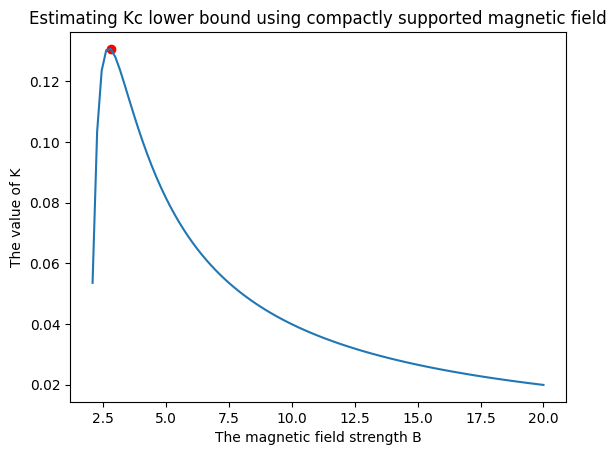

In [ ]:
x = np.linspace(2.1, 20, 100)
y = k(x)
print("The maximum for supported magentic field",max(y))
y_max = max(y)
x_max = y.argmax()
plt.plot(x, y)
plt.scatter(x[x_max], y_max, c = 'red')
print('The magnetic strength is ', x[x_max])
plt.title('Estimating Kc lower bound using compactly supported magnetic field')
plt.xlabel('The magnetic field strength B')
plt.ylabel('The value of K')
plt.savefig('K.png')
plt.show()